추출적 요약(Extractive Summarization)
- 첫 번째 방식인 추출적 요약은 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식이에요. 가령, 10개의 문장으로 구성된 텍스트가 있다면, 그중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식이죠.
- 딥 러닝보다는 주로 전통적인 머신 러닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘을 사용해서 이 방법을 사용한다고 해요.
- 이런 방식을 이미 서비스에 도입해서 활용하고 있는 사례가 있다는 것, 알고 계셨나요? 가장 대표적인 것이 네이버 뉴스 서비스에 있는 요약봇 기능입니다.
- 위에서 소개한 TextRank 알고리즘을 통해 해당 기사를 가장 잘 대표하는 단어들로 이루어진 핵심문장을 아주 효과적으로 찾아내기 때문입니다. 잘 찾아보면 요약문에 사용된 문장 3개가 원문에 그대로 있다는 것을 알 수 있을 것입니다.

추상적 요약(Abstractive Summarization)
- 원문으로부터 내용이 요약된 새로운 문장을 생성해내는 것이죠. 여기서 새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다는 것을 의미합니다. 자연어 처리 분야 중 자연어 생성(Natural Language Generation, NLG)의 영역인 셈이죠. 반면, 추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 볼 수 있을 것입니다.
- 자연어 생성하면 혹시 떠오르는 신경망이 있나요? 가장 기본적인 신경망 중 하나인데... 맞아요! RNN으로 이 문제를 풀 수 있겠군요! 그렇다면, RNN으로 추상적 요약 방식을 구현한다고 하면 문제가 전혀 없을까요?
- 장기의존성 문제(long term dependencies)

[정리]
1. 발췌방식(Extractive Summ)
  - 일반적으로 사용되는 지표:  
	 •	TF-IDF (Term Frequency-Inverse Document Frequency)  
	특정 단어가 한 문서에서 얼마나 자주 등장하는지(TF)와 다른 문서들에서는 얼마나 희귀한지(IDF)를 계산하여 중요도를 평가합니다.  
	 •	텍스트 랭크(TextRank)  
	문서 내 문장을 노드로 간주하고, 문장 간 유사도를 연결선(Edge)로 설정하여 그래프에서 중요 문장을 추출하는 알고리즘입니다.  
	•	문서에서 각 문장의 중요도를 계산하고, 상위 n개의 문장을 발췌.

2. 추상적요약(Abstractive Summ)
 - 	문맥을 분석하고 문장을 생성하기 위해 **딥러닝 모델(예: Seq2Seq, Transformer)**이 필요.
  - 	시퀀스-투-시퀀스(Seq2Seq) 학습은 입력 데이터(시퀀스)를 받아, 이를 바탕으로 새로운 출력 데이터(시퀀스)를 생성하는 딥러닝 방법입니다.  
	•	이 방식은 기계 번역, 대화 생성, 텍스트 요약 등에서 널리 사용됩니다.  
Q. 구글은 짧은 문장. 요약문을 생성하는 모델을 딥 러닝을 통해 end-to-end로 설계하도록 했어요. 구글이 메일서비스에 적용한 자동 회신(Smart Reply) 기능을 만든 것과 비슷한 딥러닝 기법이기도 한 인코더와 디코더의 구조로 구성된 이 딥 러닝 아키텍처의 이름은 무엇일까요?  
seq2seq(sequence-to-sequence)

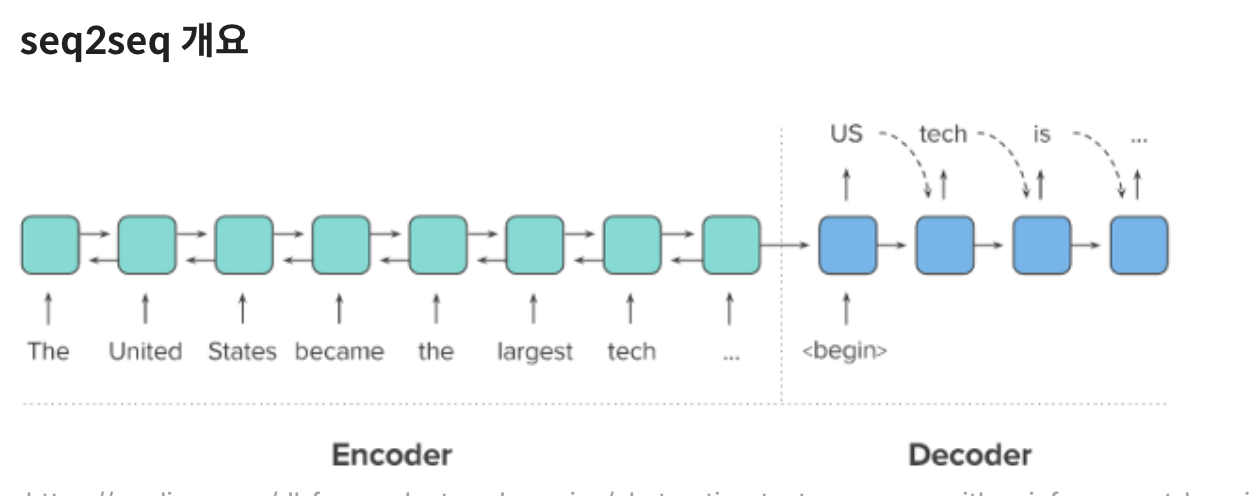

- 원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환해요. 이 벡터를 문맥 정보를 가지고 있는 벡터라고 하여 컨텍스트 벡터(context vector)라고 합니다. 두 번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성하는 거죠.

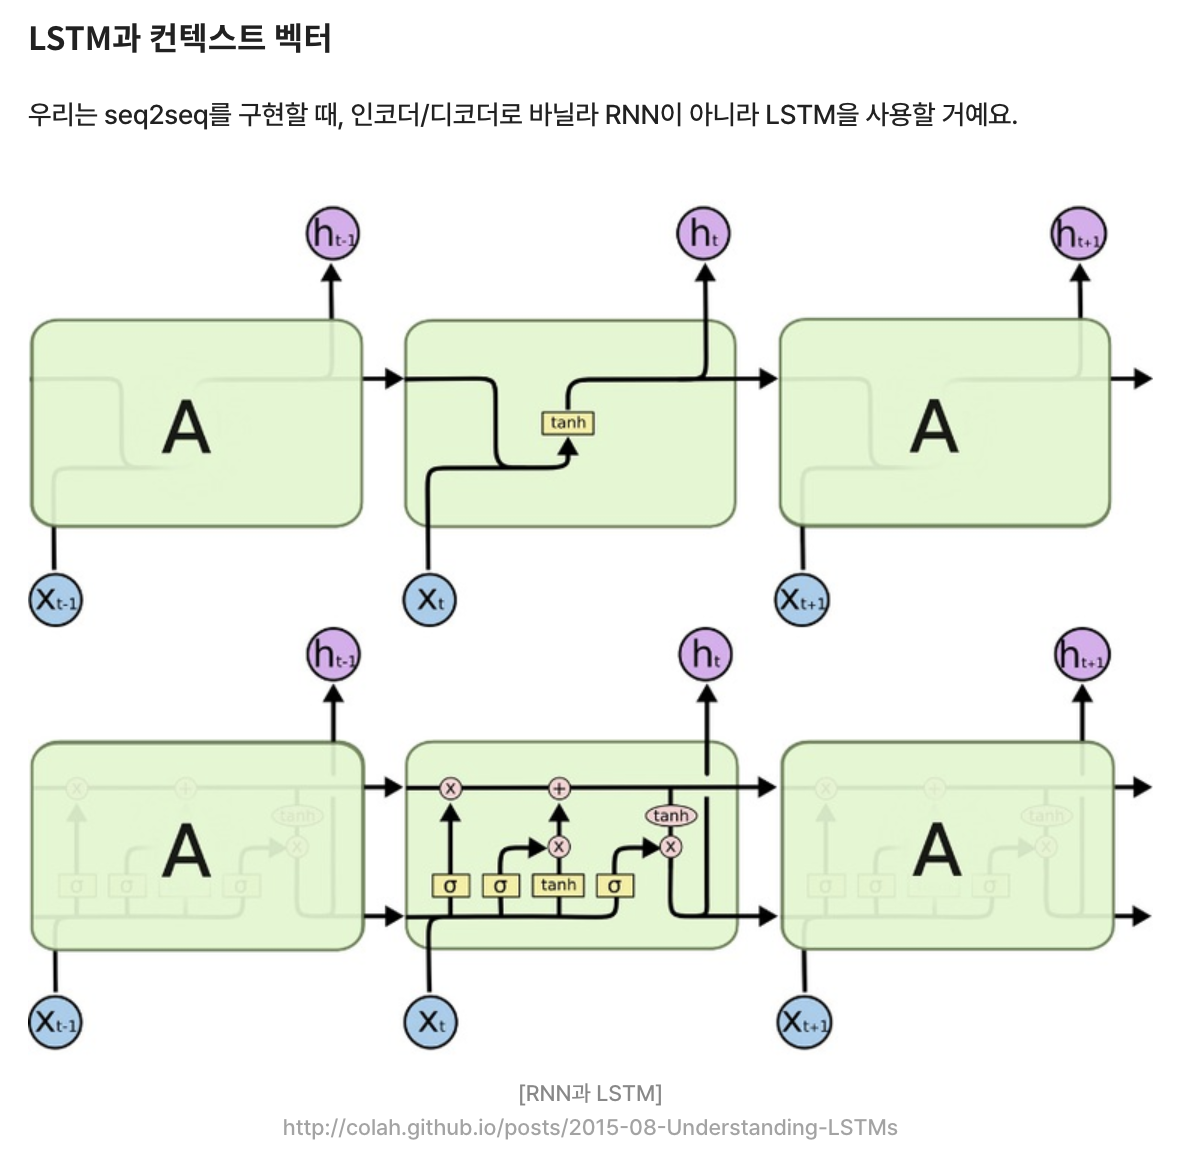

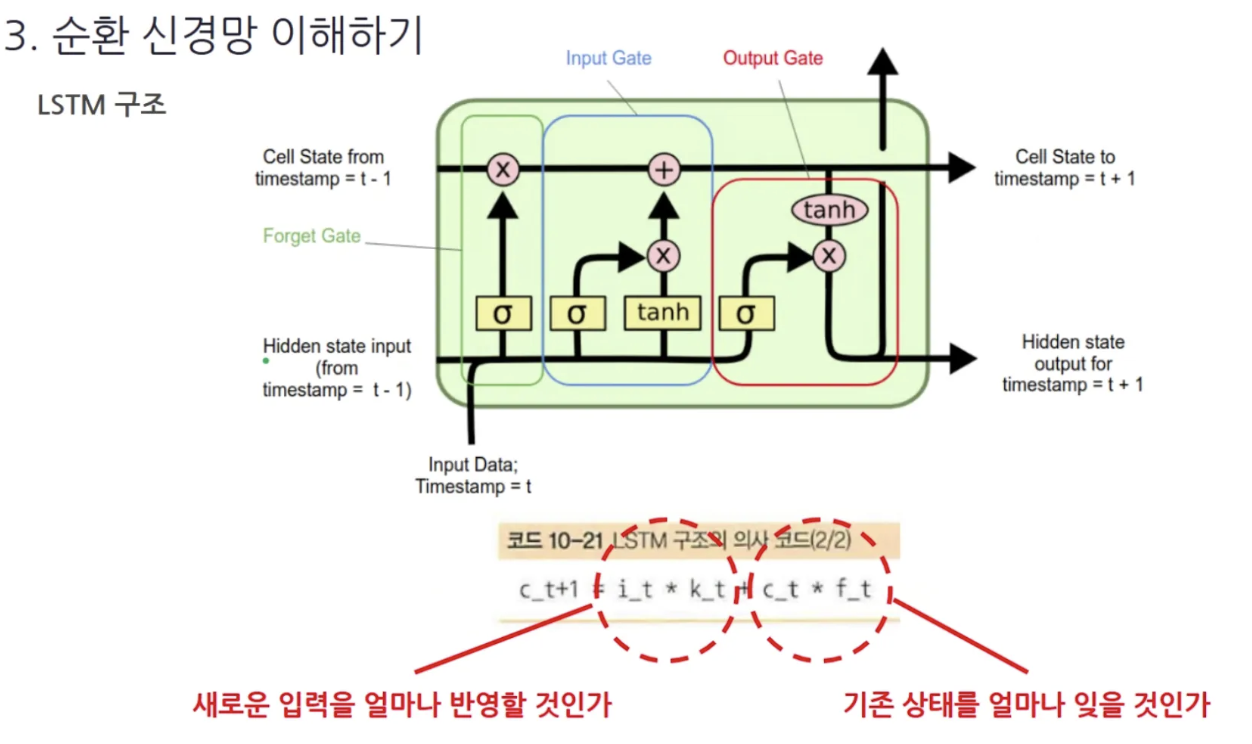
- LSTM이 바닐라 RNN과 다른 점은 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다는 점이에요. 다시 말해, 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state h와 cell state c 두 개의 값 모두 존재해야 한다는 뜻이죠.



In [ ]:
""" 이번 실습에서는 NLTK의 불용어(stopwords)를 사용할 거에요. NTLK와 NLTK 데이터셋이 설치되어 있지 않은 환경이라면 우선 NLTK를 설치하고 NTLK의 데이터셋을 다운로드해 주세요.

NLTK는 Natural Language Toolkit의 축약어로 영어 기호, 통계, 자연어 처리를 위한 라이브러리에요. 이 NLTK에는 I, my, me, over, 조사, 접미사와 같이 문장에는 자주 등장하지만, 의미를 분석하고 요약하는 데는 거의 의미가 없는 100여개의 불용어가 미리 정리되어 있어요. 이를 이용해 다운로드한 리뷰 파일에서 불용어를 제거하는 작업을 진행할 예정이에요.

NLTK 패키지에서 불용어 사전을 다운로드하고, 데이터 전처리를 위한 나머지 패키지도 함께 불러와 볼까요."""

import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


=3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_Summarization_11.26(화)/Reviews.csv", nrows=100000)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 100000


In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# 열이 너무 많아서 보기에 조금 까다롭죠. 사실 전체 데이터 중 Summary 열과 Text 열만 훈련에 사용할 거라, 이 두 개의 열만 별도로 저장하고, 다시 출력해볼게요.

# [[YOUR CODE]] E!
selected_columns = ['Summary', 'Text']  # 선택할 열 이름 지정
data = data[selected_columns]  # 해당 열만 데이터프레임에 유지
data.head()

#랜덤한 15개 샘플 출력 E
data.sample(15)

#2개의 열이 남았네요. Text 열의 내용을 요약한 것이 Summary 열이에요. 여기서는 인공 신경망을 통해 Text 시퀀스를 입력받으면, Summary 시퀀스를 예측하도록 인공 신경망을 훈련시킬 거예요.


,Summary,Text
12520,Tastes Great!,If you have the munchies....you'll like these....
26178,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
18549,Worst taste ever!,This detox tea tastes so bad that I had to for...
25470,Yummy in my Tummy :),I ordered these lovely almonds a few weeks ago...
23089,"Low Acid, Smooth Taste",I normally don't choose darker roasts of coffe...
9919,Great supplement,I've been consuming about 1 tablespoon twice p...
20344,Looks like a winner,"I'm a serious label-reader, even more so for m..."
38806,Alter Water For Electric Stovetop Cooking,"Eh, OK rice. Flavor was a bit mild for me. Pre..."
4685,LOVE IT!,This stuff is AMAZING! Fast shipping and most...
17548,My favorite for the morning!,"Great taste, best price around. Fast delivery-..."


7-5. 데이터 전처리하기 (1) 데이터 정리하기


In [ ]:
# 이제 데이터를 불러왔으니 전처리를 진행해 볼게요. 빈칸으로 존재하는 null 데이터, 의미는 같지만 다른 식으로 작성된 글 같은 중복 항목과 같은 학습할 때 방해가 되는 데이터를 먼저 솎아낼 거예요.
# 중복 샘플과 NULL 값이 존재하는 샘플 제거
# E! 확인하는 작업
print('Text 열에서 중복을 배제하기 전 샘플의 수 :', len(data['Text']))
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())
#중복을 제외한다면 Text에는 88,426개, Summary에는 72,348개의 유니크한 데이터가 존재해요. 사실 이 데이터의 Summary는 'Smelly'나 'Good Product'와 같이 아주 간단한 요약들도 많아서 Text가 달라도 Summary는 동일할 수 있어요. 하지만 Text 자체가 중복이 된 경우는 중복 샘플이므로 제거해야겠죠.


Text 열에서 중복을 배제하기 전 샘플의 수 : 100000
Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [ ]:
# 실제 중복된 데이터를 삭제하는 작업
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Text'], inplace=True) # 중복을 제거시켜주는 함수 drop_duplicates
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88426


<ipython-input-16-439a818b7c11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset = ['Text'], inplace=True)


In [ ]:
# Null 값 확인
# 데이터프레임에 Null 값이 있는지 확인하는 방법은 .isnull().sum()을 사용하면 알아볼 수 있어요.
print('null값 확인 :', data.isnull().sum())

# Summary에 1개의 Null 값이 있네요. 데이터프레임에서 Null을 제거할 때는 dropna() 함수를 사용하면 돼요.
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

null값 확인 : Summary    0
Text       0
dtype: int64
전체 샘플수 : 88425


<ipython-input-19-fef4b626667c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


In [ ]:
# 텍스트 정규화와 불용어 제거
"""살아남은 88,425개의 샘플에는 수많은 단어들이 있어요. 그런데 사실 그 단어들 중에서는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있어요.
예를 들어서 it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현이죠. 이런 경우 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는 기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법이에요.
이러한 방법론을 텍스트 처리에서는 텍스트 정규화(text normalization) 라고 해요.
여기서는 텍스트 정규화를 위한 사전(dictionary)을 아래와 같이 구성할 거예요. 이 사전은 아래의 링크에서 참고하여 만들었어요."""

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))



정규화 사전의 수:  120


In [ ]:
"""하지만 아직 끝난 게 아니에요. 일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들이 존재해요.
이를 불용어(stopwords)라고 불러요. 때로는 불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법일 수 있어요.
여기서는 NLTK에서 제공하는 불용어 리스트를 참조해, 샘플에서 불용어를 제거할 거예요."""
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))
"""NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179개라는 것을 볼 수 있죠. 이를 사용하여 불용어를 제거할 거예요.
이 작업 외에도 모든 영어 문자는 소문자로 만들고, 섞여있는 html 태그를 제거하고, 정규 표현식을 통해 각종 특수문자를 제거해서 정말 필요한 내용만 잘 학습할 수 있도록 처리할 거예요.
함수의 하단을 보면, NLTK를 이용해 불용어를 제거하는 파트가 있는데, 이는 Text 전처리 시에서만 호출하고 이미 상대적으로 문장 길이가 짧은 Summary 전처리할 때는 호출하지 않을 예정이에요.
Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 이 불용어들이 Summary에는 남아 있는 게 더 좋을 것 같습니다.!
이 처리를 위해서 함수의 인자로 remove_stopwords를 추가하고, if문을 추가했어요."""

# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    """	1.	sentence.split(" "):
	•	입력 텍스트를 공백을 기준으로 단어 단위로 나눕니다.
	•	예: "don't stop" → ['don\'t', 'stop']
  •	약어(t)가 사전(contractions)에 존재하면 해당 단어를 변환합니다.
	•	예: "don't" → "do not", "can't" → "cannot"
	•	약어가 없는 단어는 그대로 유지됩니다.
	•	예: "stop" → "stop"

	3.	' '.join([...]):
	•	변환된 단어들을 다시 공백으로 연결해 완성된 문장을 생성합니다.
	•	예:
	•	입력: "don't stop"
	•	출력: "do not stop"
    """

    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text에서만)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary에서는)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    """
    1.	sentence.split():
  	•	텍스트를 공백을 기준으로 단어 단위로 나눕니다.
  	•	예: "this is a simple example" → ['this', 'is', 'a', 'simple', 'example']
  	2.	if not word in stopwords.words('english'):
  	•	단어가 NLTK의 영어 불용어 리스트(stopwords.words('english'))에 속하지 않을 경우에만 선택합니다.
  	•	불용어 예시: "a", "the", "is" 등이 포함됩니다.
  	•	예: "this is a simple example" → ['simple', 'example']
  	3.	if len(word) > 1:
  	•	단어 길이가 2 이상인 단어만 선택합니다.
  	•	단문자 단어는 제거됩니다.
  	•	예: ['simple', 'example', 'x'] → ['simple', 'example']
  	4.	' '.join([...]):
  	•	필터링된 단어들을 공백으로 연결해 최종 텍스트를 반환합니다.
  	•	예: "this is a simple example" → "simple example"
    """
    return tokens # 전처리가 끝난 텍스트를 반환합니다.
print('=3')



불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [ ]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text)) # text만 제거!
print("summary:", preprocess_sentence(temp_summary, False))  # summar는 불용어를 제거하지 않습니다.
"""결과를 보면 기본적으로 모든 알파벳이 소문자로 변환되고, <br />과 같은 html 태그가 제거되었죠. (or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거된 것도 확인할 수 있어요. 또한 특수문자가 제거되면서 영어만 남았어요."""


text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [ ]:
"""preprocess_sentence 함수는 단일 문자열을 처리하도록 설계되었습니다.
따라서 data['Text']와 같은 Series를 처리하려면, 아래와 같이 .apply()를 사용하여 각 요소에 preprocess_sentence를 적용하면 됩니다.
즉 pandas series객체는, 문자열 관련 메서드 lower()등을 바로 적용할 수 없으니,
Series에 포함된 각 요소(문자열)에 메서드를 적용하려면 .apply()메서드를 쓰면된다!
"""

# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다.
clean_text = []

# [[YOUR CODE]]
# Series의 각 요소에 대해 preprocess_sentence 함수를 적용
clean_text = data['Text'].apply(preprocess_sentence)

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])


<ipython-input-21-04d175f6a2e0>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거


Text 전처리 후 결과:  0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts p...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object


In [ ]:
# 전처리된 Summary 데이터를 저장할 리스트
clean_summary = []

# Summary 열 데이터를 반복문으로 전처리 (불용어 제거 X)
for summary in data['Summary']:
    clean_summary.append(preprocess_sentence(summary, remove_stopwords=False))

# 결과 확인
print(clean_summary[:5])

<ipython-input-21-04d175f6a2e0>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
<ipython-input-21-04d175f6a2e0>:15: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거


['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


In [ ]:
data['Text'] = clean_text
data['Summary'] = clean_summary

<ipython-input-25-9960bd0ed281>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = clean_text
<ipython-input-25-9960bd0ed281>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Summary'] = clean_summary


In [ ]:
data.head()

,Summary,Text
0,good quality dog food,bought several vitality canned dog food produc...
1,not as advertised,product arrived labeled jumbo salted peanuts p...
2,delight says it all,confection around centuries light pillowy citr...
3,cough medicine,looking secret ingredient robitussin believe f...
4,great taffy,great taffy great price wide assortment yummy ...


In [ ]:
"""
이렇게 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해보는 것이 좋아요.
정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있어요.
이렇게 되면 샘플 자체가 빈 값을 가지게 되겠죠.
보다 쉽게 확인하기 위해 데이터들을 데이터프레임에 재저장할게요.
빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체해요.
"""
# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')
print('null갑 확인: ', data.isnull().sum())
# Summary 열에서 70개의 Null 값이 생겼네요. 원래는 단어가 있었는데, 정제 과정에서 모든 단어가 제거되어 빈 샘플이 70개나 생겼다는 의미예요.


=3
null갑 확인:  Summary    70
Text        0
dtype: int64


<ipython-input-29-de129f2e02c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('', np.nan, inplace=True)


In [ ]:
# # 이 샘플들은 모두 제거해줄게요.
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


<ipython-input-30-e015b995d37a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


7-6. 데이터 전처리하기 (2) 훈련데이터와 테스트데이터 나누기


텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


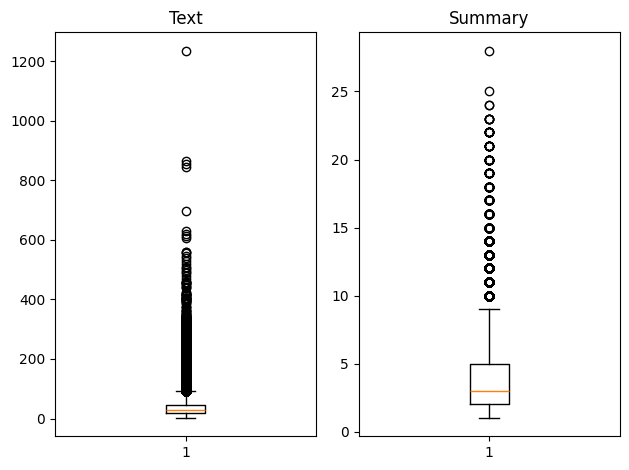

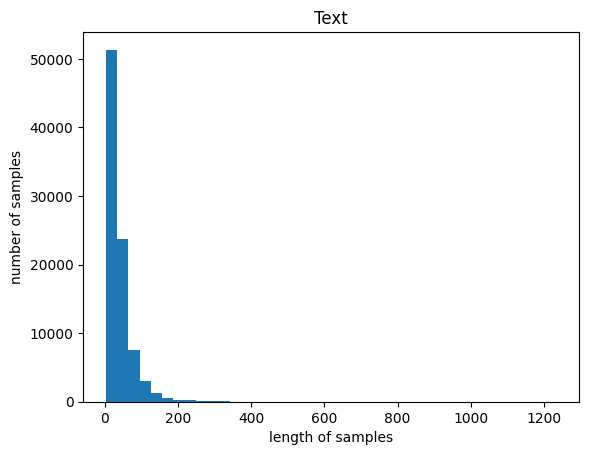

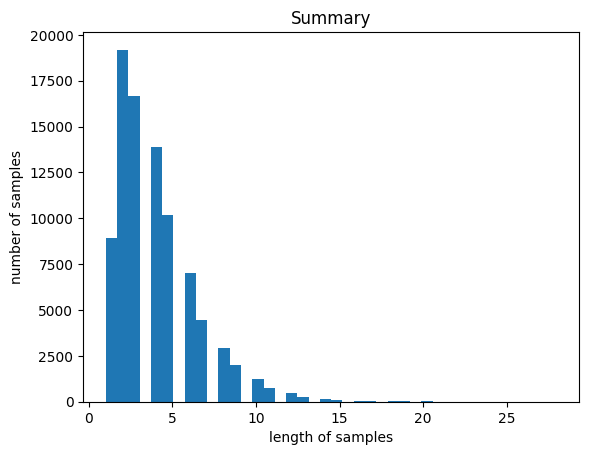

In [ ]:
# 샘플의 최대 길이 정하기
# 필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 이제 훈련에 사용할 샘플의 최대 길이를 정해줄 차례에요.
# Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해서 볼게요.

# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

"""위의 그래프처럼, 많은 양의 데이터를 다룰 때는 데이터를 시각화하여 보는 것이 도움이 돼요.
위에서부터 차례대로 그래프는 각각 실제 텍스트와 요약의 길이 분포, 실제 텍스트 샘플 길이별 개수, 요약본 샘플 길이별 개수를 나타내고 있어요.
Text의 경우 최소 길이가 2, 최대 길이가 1,235로 그 차이가 굉장히 크죠.
하지만 평균 길이는 38로 시각화된 그래프로 봤을 때는 대체적으로는 100 내외의 길이를 가진다는 것을 확인할 수 있어요.
Summary의 경우 최소 길이가 1, 최대 길이가 28, 그리고 평균 길이가 4로 Text에 비해 상대적으로 길이가 매우 짧아요.
그래프로 봤을 때에도 대체적으로 10이하의 길이를 가지고 있네요."""


In [ ]:
# 이로부터 Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정해볼게요.
text_max_len = 60
summary_max_len = 8
print('=3')

=3


In [ ]:
"""각각 50과 8로 정했는데 이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인하는 편이 객관적으로 길이를 결정하는 데 도움이 될거예요.
훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수를 만들어서 좀 더 정확하게 판단해볼게요."""

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')


=3


In [ ]:
#이렇게 만든 함수를 Text와 Summary에 적용해 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 볼 수 있겠죠.
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])


전체 샘플 중 길이가 60 이하인 샘플의 비율: 0.8353347292173617
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


- 77%가 괜찮은가 고민  
> 작업 중인 데이터가 문서 요약이 아닌 문장 요약 또는 짧은 텍스트가 주로 다루어지는 경우라면, 길이가 50 이하인 비율이 높아도 괜찮다고 함


In [ ]:
# E! Q. Text와 Summary를 담고 있는 data 데이터프레임을 위에서 임의로 정의한 text_max_len과 summary_max_len의 길이보다 큰 샘플을 제외하는 코드를 작성하세요.
# (힌트 : apply 함수와 lamda식을 사용)


# 조건에 맞지 않는 샘플 제거 Text 60, summary 8 기준 초과는 삭제
data = data[
    (data['Text'].apply(lambda x: len(x.split())) <= text_max_len) &
    (data['Summary'].apply(lambda x: len(x.split())) <= summary_max_len)
]

# 결과 확인
print(f"Filtered data shape: {data.shape}")

Filtered data shape: (70761, 2)


시작 토큰과 종료 토큰 추가하기


In [ ]:
# 디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고, 종료 토큰을 예측한 순간에 문장 생성을 멈추는 거였죠.
"""seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있어요.
이번 실습에서는 시작 토큰은 sostoken, 종료 토큰은 eostoken이라 임의로 명명하고 앞, 뒤로 추가할 거예요.
디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 decoder_input,
디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 decoder_target이라고 이름을 정했어요.
두 개의 문장 모두 Summary 열로부터 만들 거예요."""

# 요약Summary 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x) # sos토큰을 맨앞에, 모든 열에 추가
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken') # eos토큰을 맨뒤에
data.head()


<ipython-input-39-c68d7ea82b13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x) # sos토큰을 맨앞에
<ipython-input-39-c68d7ea82b13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken') # eos토큰을 맨뒤에


,Summary,Text,decoder_input,decoder_target
0,good quality dog food,bought several vitality canned dog food produc...,sostoken good quality dog food,good quality dog food eostoken
1,not as advertised,product arrived labeled jumbo salted peanuts p...,sostoken not as advertised,not as advertised eostoken
2,delight says it all,confection around centuries light pillowy citr...,sostoken delight says it all,delight says it all eostoken
3,cough medicine,looking secret ingredient robitussin believe f...,sostoken cough medicine,cough medicine eostoken
4,great taffy,great taffy great price wide assortment yummy ...,sostoken great taffy,great taffy eostoken


In [ ]:
/content/drive/MyDrive/Colab Notebooks/token_data.csv

In [ ]:
# 앞뒤로 토큰이 잘 붙었죠? 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장해 줄게요.
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [ ]:
encoder_input.shape

(70761,)

In [ ]:
# 이제 훈련 데이터와 테스트 데이터를 분리할거에요.
# 여기서는 직접 해볼게요. 우선, encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어줄게요.

indices = np.arange(encoder_input.shape[0]) # 인코더 인풋 데이터 수만큼 인덱스 생성
np.random.shuffle(indices) # 인덱스를 무작위로 섞어 데이터 순서 랜덤화
print(indices)

# 왜 랜덤하게 섞는가? : 데이터가 정렬되어있으면 특정 패턴이 학습과정에 영향을 줄 수 있기에
# 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 되겠죠.
# 출력 결과는 무작위로 섞인 정수 리스트입니다.

[11012 36080 63443 ... 35250 16389   456]


In [ ]:
# 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 되겠죠.
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

#이제 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리해 줄게요.
#전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의해 줄게요.
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

# 나는 text maxlen을 60으로 설정 -> 노드와 차이

=3
테스트 데이터의 수 : 14152
훈련 데이터의 개수 : 56609
훈련 레이블의 개수 : 56609
테스트 데이터의 개수 : 14152
테스트 레이블의 개수 : 14152


단어 집합(vocabulary) 만들기 및 정수 인코딩



In [ ]:
"""이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 해요.
이를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요해요. 이 과정을 단어 집합(vocabulary) 을 만든다고 표현해요.
훈련 데이터에 대해서 단어 집합을 만들어볼게요. 우선, 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만들게요.
Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있어요."""
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [ ]:
"""이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었어요. 현재 생성된 단어 집합은 src_tokenizer.word_index에 저장되어 있어요.
그런데 우리는 이렇게 만든 단어 집합에 있는 모든 단어를 사용하는 것이 아니라, 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행하려고 해요.
등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해볼게요.
src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻을 수 있어요."""

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 각단어 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

"""encoder_input_train에는 3만여 개의 단어가 있네요. 그 아래의 통계 정보들을 해석해볼까요?
등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지하네요.
하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.39%밖에 되지 않아요.
그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 합니다.
위에서 이를 제외한 단어 집합의 크기를 8천여 개로 계산했는데, 이와 비슷한 값으로 어림잡아 단어 집합의 크기를  (나는 9,000)으로 제한해볼게요.
토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있어요."""


단어 집합(vocabulary)의 크기 : 34837
등장 빈도가 6번 이하인 희귀 단어의 수: 25754
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9083
단어 집합에서 희귀 단어의 비율: 73.92714642477826
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.113998712273858


- 희귀단어는 정보의 측면으론 중요도가 높지 않았는지?
> 딥러닝 모델의 학습기 준,	희귀 단어의 학습 부족 :
희귀 단어는 데이터셋에서 등장 빈도가 낮아, 모델이 학습 과정에서 해당 단어를 충분히 학습하지 못합니다. 이로 인해 모델이 희귀 단어를 처리하는 데 어려움을 겪을 수 있기 때문에 학습에서 제외시킵니다.






In [ ]:
src_vocab = 9000 # 단어 집합 크기 제한 (Tokenizer(num_words=src_vocab)),
                 # src_vocab을 9,000으로 설정하면, 빈도 순위 상위 9,000개의 단어만 단어 집합에 포함됩니다.
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 (나는 9,000으로 제한)
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성, 등장 빈도가 낮아 순위에서 밀린 희귀 단어들은 자동으로 단어 집합에서 제외됩니다.
print('=3')



=3


In [ ]:
"""texts_to_sequences()는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행해요.
현재 단어 집합의 크기를 8,000으로 제한했으니까 이제 9,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않아요."""
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])



[[114, 7089, 347, 31, 79, 21, 2766, 67, 8395, 7876, 2793, 785, 402, 139, 420, 256, 221, 79, 107, 45, 297, 420, 918, 383, 62, 114, 795, 2987, 1361, 172, 1968, 2793, 68, 648, 105, 27], [362, 397, 209, 60, 2, 103, 4, 1662, 381, 182, 70, 368, 734, 172, 1527, 928, 278, 623, 209, 60, 239, 326, 1662, 1527, 433, 1662, 25, 33, 129, 4521, 61, 197, 997, 1432, 267, 624], [5, 3, 4, 160, 121, 104, 4, 4, 1, 716, 1124, 104, 919, 750, 4, 115, 2512, 919, 4, 67, 738, 104, 90, 5821, 6243, 90, 49, 755, 1086, 677, 3]]


In [ ]:
# Summary 데이터에 대해서도 동일한 작업을 수행할게요.
# 케라스의 토크나이저를 사용하여 decoder_input_train을 입력으로 전체 단어 집합과 각 단어에 대한 빈도수를 계산해요.
tar_tokenizer = Tokenizer() # 토크나이저 정의
tar_tokenizer.fit_on_texts(decoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [ ]:
"""이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었어요.
이는 tar_tokenizer.word_index에 저장되어 있어요. tar_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데,
이를 통해서 통계적인 정보를 얻어서, 등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해볼게요."""

threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

"""등장 빈도가 5회 이하인 단어들은 단어 집합에서 약 77%를 차지하고 있네요.
하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 5.87%밖에 되지 않아요.
아까 했던 것과 동일하게 이 단어들은 모두 제거할게요. 어림잡아 2,000을 단어 집합의 크기로 제한할게요."""

단어 집합(vocabulary)의 크기 : 10969
등장 빈도가 5번 이하인 희귀 단어의 수: 8456
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2513
단어 집합에서 희귀 단어의 비율: 77.08998085513721
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.648683136378407


In [ ]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 11, 24, 38, 56], [1, 644, 5, 1133], [1, 58, 3, 18, 6, 342, 193], [1, 24, 38, 28, 18, 208, 36, 894], [1, 57, 184, 9, 1241]]
target
decoder  [[11, 24, 38, 56, 2], [644, 5, 1133, 2], [58, 3, 18, 6, 342, 193, 2], [24, 38, 28, 18, 208, 36, 894, 2], [57, 184, 9, 1241, 2]]


In [ ]:
"""정상적으로 정수 인코딩 작업이 끝났어요.
현재 decoder_input_train과 decoder_target_train에는 더 이상 숫자 2,000이 넘는 숫자들은 존재하지 않아요.
그런데 다음 작업인 패딩 하기로 넘어가기 전에 한 가지 점검해야 할 것이 있어요.

전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있어요.
이 현상은 길이가 상대적으로 길었던 원문(Text)의 경우에는 문제가 별로 없겠지만,
애초에 평균 길이가 4밖에 되지 않았던 요약문(Summary)의 경우에는 이 현상이 굉장히 두드러졌을 가능성이 높겠죠.

요약문에서 길이가 0이 된 샘플들의 인덱스를 받아와볼게요.
여기서 주의할 점은 요약문인 decoder_input에는 sostoken 또는 decoder_target에는 eostoken이 추가된 상태이고,
이 두 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플 수와 동일하게 매우 높으므로 단어 집합 제한에도 삭제되지 않아요.
그래서 이제 길이가 0이 된 요약문의 실제 길이는 1로 나올 거예요.
길이 0이 된 decoder_input에는 sostoken, decoder_target에는 eostoken만 남아 있을 테니까요.

훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장해볼게요.
이 샘플들은 모두 삭제할 거예요."""

drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]
# enumerate()는 반복 가능한 객체(예: 리스트, 튜플, 문자열 등)에 대해 인덱스와 값을 동시에 반환합니다.
# -> decoder_input_train에서 각 문장(sentence)과 해당 문장의 인덱스(index)를 반환

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))



삭제할 훈련 데이터의 개수 : 1339
삭제할 테스트 데이터의 개수 : 352
훈련 데이터의 개수 : 55270
훈련 레이블의 개수 : 55270
테스트 데이터의 개수 : 13800
테스트 레이블의 개수 : 13800


패딩하기


In [ ]:
"""텍스트 시퀀스를 정수 시퀀스로 변환했다면, 이제 서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 해주어야 해야 해요.
아까 정해두었던 최대 길이로 패딩 해 줄 거에요. 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춰줄게요."""
# Text maxlen 나는 60
# summary maxlen 나는 8

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')
print('=3')

# 이제 학습에 필요한 데이터 전처리가 모두 끝났어요.


=3


7-8. 모델 설계하기


In [ ]:
# 함수형 API를 이용해서 인코더를 설계해 볼게요.
# Q.인코더 LSTM 1을 참고해서 나머지 인코더의 LSTM 2, LSTM 3의 코드를 완성하세요.

from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256 # LSTM의 뉴런 수, 출력 차원.

# 인코더
encoder_inputs = Input(shape=(text_max_len,)) #입력 형태: (batch_size, text_max_len)에서 batch_size는 가변적이고 text_max_len은 고정된 시퀀스 길이입니다.

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)
""" Embedding: 입력 단어를 고정된 차원의 실수 벡터로 변환합니다.
	•	src_vocab: 단어 집합 크기. 입력 단어를 src_vocab 내에서 정수로 인코딩합니다.
	•	embedding_dim: 각 단어를 표현하는 벡터의 차원.
	•	출력:
	•	(batch_size, text_max_len, embedding_dim) 형태의 텐서를 반환합니다.
	•	즉, 각 단어가 embedding_dim 크기의 벡터로 변환됩니다."""

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
"""	•	hidden state와 cell state를 사용하여 시퀀스 데이터를 학습.
	•	hidden state: 현재 시점에서의 단기 기억.
	•	cell state: 장기 기억으로 이전 스텝의 중요한 정보 보존.
  •	return_sequences=True: 모든 time step의 출력을 반환.
	•	return_state=True: 마지막 hidden state와 cell state를 반환.

  •	출력:
	•	encoder_output1: (batch_size, text_max_len, hidden_size) 크기의 텐서.
	•	state_h1: (batch_size, hidden_size) 크기의 텐서. 마지막 스텝의 hidden state.
	•	state_c1: (batch_size, hidden_size) 크기의 텐서. 마지막 스텝의 cell state.
"""

# 인코더의 LSTM 2
# [[YOUR CODE]]
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) # LSTM 1의 출력인 encoder_output1을 입력으로 받습니다.

# 인코더의 LSTM 3
# [[YOUR CODE]]
encoder_lstm3 = LSTM(hidden_size, return_sequences=False, return_state=True, dropout=0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)
"""	•	return_sequences=False: 모든 time step의 출력이 아닌 마지막 time step의 출력만 반환.
	•	역할:
	•	컨텍스트 벡터(Context Vector)로 사용할 마지막 출력만 반환하여 디코더에 전달.
	•	출력:
	•	encoder_output3: (batch_size, hidden_size) 크기의 텐서. 마지막 스텝의 출력. 디코더에 전달되는 컨텍스트 벡터.
	•	state_h3: 마지막 스텝의 hidden state.디코더 초기 상태로 사용.
	•	state_c3: 마지막 스텝의 cell state. 디코더 초기 상태로 사용.
  """
"""인코더의 LSTM은 총 3개의 층으로 구성해서 모델의 복잡도를 높였어요.
hidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면, 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있죠.
3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줘야겠죠?
"""



'인코더의 LSTM은 총 3개의 층으로 구성해서 모델의 복잡도를 높였어요. \nhidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면, 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있죠. \n3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줘야겠죠?\n'

In [ ]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim) # tar_vocab: 디코더(목적어)의 단어 집합 크기.
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
# 	디코더 LSTM은 한 시점에서 다음 단어를 예측하기 위해 현재 시점의 입력과 이전 시점의 정보를 활용.

decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])
"""	•	인코더에서 전달된 마지막 hidden state와 cell state를 디코더 초기 상태로 사용.
	•	이를 통해 인코더에서 추출한 입력 시퀀스의 요약 정보(컨텍스트)를 디코더가 사용할 수 있음.

  •	출력:
	•	decoder_outputs: 모든 time step의 출력. (batch_size, timesteps, hidden_size).
	•	_: 디코더의 마지막 hidden state.
	•	_: 디코더의 마지막 cell state"""

In [ ]:

"""디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일해요.
하지만 LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 해요.
디코더의 출력층을 설계해볼게요."""

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)
"""•	Dense 레이어:
	•	Fully connected layer로 각 time step에서 단어 집합의 크기만큼 출력을 생성.
	•	각 출력은 단어 집합에서 특정 단어의 확률로 표현.
	•	매개변수:
	•	tar_vocab: 디코더 단어 집합의 크기.
	•	activation='softmax': 다중 클래스 분류를 위해 softmax 활성화 함수 사용.
	•	출력:
	•	decoder_softmax_outputs: (batch_size, timesteps, tar_vocab) 형태의 텐서.
	•	각 time step마다 단어 집합 내에서 특정 단어의 확률 분포를 반환."""

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

"""	1.	디코더의 입력:
	•	디코더는 이전에 생성된 단어를 입력으로 받아 다음 단어를 예측.
	•	인코더의 컨텍스트 벡터(state_h와 state_c)를 초기 상태로 사용하여 입력 시퀀스의 정보를 디코더에 전달.
	2.	LSTM 동작:
	•	decoder_outputs: 모든 time step에서의 출력 벡터를 반환.
	•	각 출력은 디코더의 현재 상태를 나타냄.
	3.	출력층 동작:
	•	Dense 레이어는 각 time step마다 단어 집합의 확률 분포를 생성.
	•	Softmax를 사용하여 단어 집합 내 특정 단어의 확률을 계산.
	4.	전체 모델:
	•	인코더와 디코더를 결합하여 입력 시퀀스를 읽고 요약문을 생성하는 구조."""

"""디코더의 출력층에서는 Summary의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀어야 해요.
그렇기 때문에 Dense의 인자로 tar_vocab을 주고, 활성화 함수로 소프트맥스 함수를 사용하고 있어요.
지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq에요.
그런데 디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 있어요! 바로 어텐션 메커니즘이에요."""

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 60)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 60, 128)        │      1,152,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 60, 256),      │        394,240 │ embedding[0][0]        │
│                           │ (None, 256), (None,    │                │                        │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 60, 256),      │        525,312 │ lstm[0][0]             │
│                           │ (None, 256), (None,    │                │                        │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, None, 128)      │        256,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 256), (None,   │        525,312 │ lstm_1[0][0]           │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, None, 256),    │        394,240 │ embedding_3[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm_2[0][1],          │
│                           │ 256)]                  │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 2000)     │        514,000 │ lstm_5[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,761,104 (14.35 MB)

 Trainable params: 3,761,104 (14.35 MB)

 Non-trainable params: 0 (0.00 B)

'디코더의 출력층에서는 Summary의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀어야 해요. \n그렇기 때문에 Dense의 인자로 tar_vocab을 주고, 활성화 함수로 소프트맥스 함수를 사용하고 있어요.\n지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq에요. \n그런데 디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 있어요! 바로 어텐션 메커니즘이에요.'

어텐션 메커니즘

In [ ]:
"""어텐션 메커니즘
어텐션 메커니즘을 수행하는 어텐션 함수를 설계하는 것은 또 다른 새로운 신경망을 설계해야 한다는 뜻이에요. 어텐션 함수를 설계해보는 것은 다음 기회로 미루기로 하고, 여기서는 TensorFlow에 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하는지 배워볼게요. 참고로 여기서 사용하는 어텐션 함수는 Bahdanau 스타일의 어텐션입니다. 이 어텐션에 대한 자세한 설명은 텐서플로우 홈페이지를 참고하세요.
아래와 같이 어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정해 봅시다."""

from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3]) #인코더 LSTM 마지막 층 output가져오기
"""	•	attn_layer는 디코더의 출력(decoder_outputs)과 인코더의 출력(encoder_outputs)을 입력받아, 디코더의 각 time step에 대한 컨텍스트 벡터를 계산합니다.
	•	계산 과정:
	1.	디코더 hidden state와 인코더 hidden state 간의 **유사도(가중치)**를 계산.
	2.	Softmax를 통해 가중치를 정규화.
	3.	인코더 hidden state의 가중합을 계산하여 컨텍스트 벡터를 생성."""


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
"""	•	Concatenate를 사용하여 디코더의 hidden state와 어텐션 컨텍스트 벡터를 연결합니다.
	•	이 연결된 벡터는 디코더의 다음 출력층으로 전달되어 예측을 수행합니다."""


# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)
"""	•	Dense(tar_vocab, activation='softmax'):
	•	목표 단어 집합의 크기(tar_vocab)에 맞는 출력층을 생성합니다.
	•	Softmax 활성화 함수는 각 출력 단어에 대한 확률 분포를 생성합니다.
	•	입력: 연결된 벡터 (decoder_concat_input).
	•	출력: 디코더가 다음 단어를 예측하기 위한 확률 분포."""


# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()
"""	•	입력:
	•	encoder_inputs: 인코더 입력 (텍스트 시퀀스).
	•	decoder_inputs: 디코더 입력 (요약문 시퀀스).
	•	출력:
	•	decoder_softmax_outputs: 예측된 요약문의 단어 시퀀스."""

#위의 코드는 인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용하고,
#어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동하고 있어요.
"""
주요 흐름 요약

	1.	인코더:
	•	입력 텍스트를 임베딩 → LSTM → 모든 hidden state (encoder_outputs) 생성.
	2.	디코더:
	•	이전 단어(디코더 입력)를 기반으로 hidden state(decoder_outputs) 생성.
	3.	어텐션 적용:
	•	디코더 hidden state와 인코더 hidden state를 비교하여 컨텍스트 벡터 생성.
	•	컨텍스트 벡터와 디코더 hidden state를 연결하여 최종 입력 구성.
	4.	출력층:
	•	연결된 벡터를 통해 다음 단어를 예측하는 Softmax 출력 생성."""



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 60)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 60, 128)        │      1,152,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 60, 256),      │        394,240 │ embedding[0][0]        │
│                           │ (None, 256), (None,    │                │                        │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 60, 256),      │        525,312 │ lstm[0][0]             │
│                           │ (None, 256), (None,    │                │                        │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, None, 128)      │        256,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 256), (None,   │        525,312 │ lstm_1[0][0]           │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, None, 256),    │        394,240 │ embedding_3[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm_2[0][1],          │
│                           │ 256)]                  │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer           │ (None, None, 256)      │            256 │ lstm_5[0][0],          │
│ (AdditiveAttention)       │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat_layer              │ (None, None, 512)      │              0 │ lstm_5[0][0],          │
│ (Concatenate)             │                        │                │ attention_layer[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, None, 2000)     │      1,026,000 │ concat_layer[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,273,360 (16.30 MB)

 Trainable params: 4,273,360 (16.30 MB)

 Non-trainable params: 0 (0.00 B)

7-9. 모델 훈련하기


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 최적 모델 저장 경로 설정
checkpoint_filepath1 = 'best_model1.keras'

# ModelCheckpoint 콜백 정의
mc = ModelCheckpoint(filepath=checkpoint_filepath1,  # 저장 경로
                     monitor='val_loss',           # 모니터링할 기준 지표
                     save_best_only=True,          # 최상의 모델만 저장
                     verbose=1)                    # 진행 상황 표시

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

# es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

history1 = model.fit(x=[encoder_input_train, decoder_input_train],
                    y=decoder_target_train,
                    validation_data=([encoder_input_test, decoder_input_test],
                    decoder_target_test),
                    callbacks=[mc],  # 콜백 추가
                    batch_size=256, epochs=20)

# 추후사용
                    # batch_size=256, callbacks=[es], epochs=50)

Epoch 1/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 3.1600
Epoch 1: val_loss improved from inf to 2.58410, saving model to best_model1.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 37s 153ms/step - loss: 3.1582 - val_loss: 2.5841
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 2.5895
Epoch 2: val_loss improved from 2.58410 to 2.52261, saving model to best_model1.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 38s 139ms/step - loss: 2.5895 - val_loss: 2.5226
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 2.5252
Epoch 3: val_loss improved from 2.52261 to 2.46839, saving model to best_model1.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - loss: 2.5251 - val_loss: 2.4684
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 2.4840
Epoch 4: val_loss improved from 2.46839 to 2.43523, saving model to best_model1.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - loss: 2.4839 - val_loss: 2.4352
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 2.4383
Epo

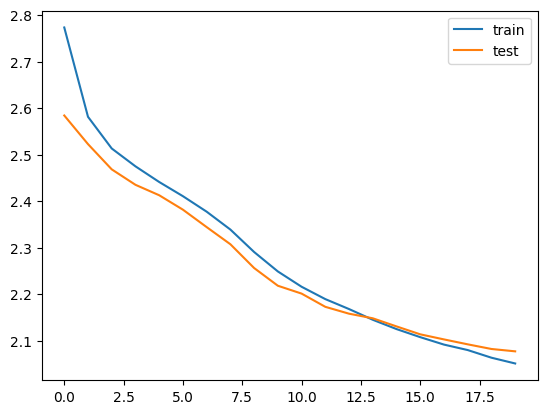

In [ ]:
# 이제 훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화 해봐요.
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='val')
plt.legend()
plt.show()

- 처음 에폭이 50번으로 설정되어 있어, 컴퓨팅을 줄이고자 20번으로 줄임.
- 오버피팅이 나지 않아, 모델 체크포인트를 설정하였던 것을 다시 사용!
- 이전 history와 새로 얻은 history를 병합하여 그래프를 다시 그려보는 것을 계획 하고 있습니다.




In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# 1. 이전 학습의 최적 모델 로드
model = load_model(checkpoint_filepath1)

# 2. 모델 컴파일
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

# 3. 새로운 모델 체크포인트 설정
checkpoint_filepath2 = 'best_model2.keras'  # 새로운 체크포인트 경로
mc2 = ModelCheckpoint(filepath=checkpoint_filepath2,  # 새로운 모델 저장 경로
                      monitor='val_loss',            # 검증 손실 기준으로 모니터링
                      save_best_only=True,           # 최적 모델만 저장
                      verbose=1)                     # 진행 상황 출력


history2 = model.fit(x=[encoder_input_train, decoder_input_train],
                     y=decoder_target_train,
                     validation_data=([encoder_input_test, decoder_input_test],
                                      decoder_target_test),
                     batch_size=256, epochs=30,  # 추가 학습 에폭 수 설정
                     callbacks=[mc2],  # 새로운 체크포인트 추가
                     verbose=1)


Epoch 1/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 2.0461
Epoch 1: val_loss improved from inf to 2.17547, saving model to best_model2.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - loss: 2.0461 - val_loss: 2.1755
Epoch 2/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 2.0477
Epoch 2: val_loss improved from 2.17547 to 2.05938, saving model to best_model2.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 30s 141ms/step - loss: 2.0477 - val_loss: 2.0594
Epoch 3/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 2.0175
Epoch 3: val_loss improved from 2.05938 to 2.05628, saving model to best_model2.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - loss: 2.0175 - val_loss: 2.0563
Epoch 4/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 2.0107
Epoch 4: val_loss improved from 2.05628 to 2.05050, saving model to best_model2.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - loss: 2.0107 - val_loss: 2.0505
Epoch 5/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 2.0039
Epo

In [ ]:
# 5. 히스토리 병합
# 이전 history와 새로 얻은 history 병합
combined_history = {
    key: history1.history[key] + history2.history[key]
    for key in history1.history.keys()
}

# 6. 병합된 히스토리 출력
print("Combined Loss:", combined_history['loss'])        # 전체 학습 손실 값
print("Combined Validation Loss:", combined_history['val_loss'])   # 전체 검증 손실 값

Combined Loss: [2.7731387615203857, 2.5812878608703613, 2.513235092163086, 2.4748878479003906, 2.44126033782959, 2.4107630252838135, 2.3774826526641846, 2.3390817642211914, 2.2908949851989746, 2.249122381210327, 2.216247797012329, 2.1897170543670654, 2.1683268547058105, 2.1453232765197754, 2.125352621078491, 2.1079955101013184, 2.0920188426971436, 2.0802817344665527, 2.063861131668091, 2.0514676570892334, 2.0432193279266357, 2.0394651889801025, 2.0199761390686035, 2.009160041809082, 1.9999916553497314, 1.9910491704940796, 1.9815388917922974, 1.972824215888977, 1.9656624794006348, 1.95786452293396, 1.9483520984649658, 1.9413423538208008, 1.9329880475997925, 1.925610899925232, 1.9167970418930054, 1.908732295036316, 1.8996338844299316, 1.8906148672103882, 1.880711555480957, 1.8707138299942017, 1.8619203567504883, 1.8514773845672607, 1.8432590961456299, 1.8343087434768677, 1.8256655931472778, 1.8174214363098145, 1.8093092441558838, 1.800055742263794, 1.7925379276275635, 1.7848783731460571]

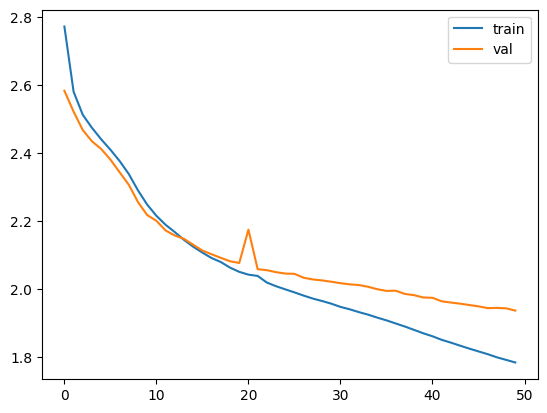

In [ ]:
# 재 시각화
plt.plot(combined_history['loss'], label='train')
plt.plot(combined_history['val_loss'], label='val')
plt.legend()
plt.show()

7-10. 인퍼런스 모델 구현하기

In [ ]:
# 테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개의 사전을 아래와 같이 미리 준비해 둡니다.
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')



=3


In [ ]:
"""seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 한다는 것, 알고 계시나요?
훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로, 인코더와 디코더를 엮은 통짜 모델 하나만 준비했습니다.
그러나 정답 문장이 없는 인퍼런스 단계에서는
만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문에
부득이하게 인퍼런스를 위한 모델 설계를 별도로 해주어야 합니다. 이때는 인코더 모델과 디코더 모델을 분리해서 설계합니다."""

# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])
"""	•	인코더의 출력:
	•	encoder_output3: 인코더의 모든 타임스텝에서 생성된 hidden state들. 그림에서 Hidden으로 표현된 벡터들.
	•	state_h3: 인코더의 마지막 타임스텝에서 나온 hidden state.
	•	state_c3: 인코더의 마지막 타임스텝에서 나온 cell state.
	•	이 출력은 디코더와 어텐션 메커니즘의 입력으로 전달됩니다."""

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))
"""	•	디코더 초기 상태로 전달되는 녹색 블록의 초기 값( h^d_1, c^d_1 )에 해당합니다."""

dec_emb2 = dec_emb_layer(decoder_inputs)
"""	•	학습 단계에서 정의된 디코더 임베딩 층(dec_emb_layer)를 그대로 재사용합니다.
	•	decoder_inputs: 디코더의 입력 시퀀스. 이는 인퍼런스 단계에서 반복적으로 한 단어씩 입력됩니다.

	설명:
	•	디코더에 들어가는 입력 단어 시퀀스는 먼저 임베딩층(dec_emb_layer)을 통해 임베딩 벡터로 변환됩니다.
	•	이 단계는 입력 단어를 실수 벡터 공간으로 변환하여 LSTM에 전달합니다.
	•	그림에서:
	•	디코더의 파란색 Input 블록이 임베딩을 통해 녹색 블록(LSTM의 입력)으로 변환되는 과정에 해당합니다.
"""


# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
"""	•	학습 단계와 동일하게 디코더 LSTM(decoder_lstm)을 사용하되, **초기 상태(initial_state)**로 이전 시점의 hidden state와 cell state를 전달합니다.
	•	출력 정의:
	•	decoder_outputs2: 디코더의 현재 타임스텝 출력. 인퍼런스 단계에서 다음 단어를 예측하기 위한 logits 값으로 사용됩니다.
	•	state_h2, state_c2: 디코더 LSTM의 현재 시점 hidden state와 cell state. 다음 타임스텝에서 디코더의 초기 상태로 사용됩니다.
	•	설명:
	•	디코더의 LSTM은 현재 입력값(dec_emb2)과 초기 상태([decoder_state_input_h, decoder_state_input_c])를 기반으로 다음 Hidden State ( h^d )와 Cell State ( c^d )를 계산합니다.
	•	출력값 decoder_outputs2는 디코더의 각 타임스텝에서 출력된 Hidden State의 시퀀스( h^d_1, h^d_2, …, h^d_t )입니다.
	•	상태값 state_h2와 state_c2는 디코더의 마지막 Hidden State와 Cell State입니다.
	•	그림에서:
	•	디코더의 녹색 블록에서 생성된 Hidden State ( h^d_1, h^d_2, …, h^d_t )를 나타냅니다.
	•	state_h2와 state_c2는 마지막 녹색 블록의 상태입니다.

"""
print('=3')

=3


In [ ]:
# 어텐션 메커니즘을 사용하는 출력층을 설계해 주세요.

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
"""	•	text_max_len: 인코더 출력(hidden state)의 타임스텝 수. 인코더가 처리한 입력 시퀀스의 길이입니다.
	•	hidden_size: 인코더의 LSTM의 hidden state 벡터 크기입니다.
	•	이 입력은 인코더의 모든 타임스텝에서의 hidden state를 디코더로 전달하는 역할을 합니다.
"""
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
"""	•	attn_layer: 학습 단계에서 사용된 어텐션 층(AdditiveAttention)을 재사용합니다.
	•	입력:
	•	decoder_outputs2: 디코더의 현재 타임스텝 hidden state.
	•	decoder_hidden_state_input: 인코더의 모든 타임스텝 hidden state.
	•	출력:
	•	attn_out_inf: 어텐션 메커니즘을 통해 계산된 컨텍스트 벡터(context vector). 이는 디코더의 현재 타임스텝에서 중요한 인코더의 hidden state 정보를 가중합으로 제공합니다.
  최종
  이 코드는 디코더의 출력 Hidden State(decoder_outputs2)와 인코더의 Hidden State 전체(decoder_hidden_state_input)를 입력으로 받아, 디코더의 현재 타임스텝에 맞는 컨텍스트 벡터를 계산합니다.
	•	decoder_outputs2:
	•	디코더의 각 타임스텝별 Hidden State의 출력 시퀀스.
	•	모양: (batch_size, target_seq_len, hidden_size)
	•	예를 들어, 디코더가 3개의 타임스텝을 수행했다면:
  decoder_outputs2 = [h_d1, h_d2, h_d3]
  	decoder_hidden_state_input:
	•	인코더의 모든 타임스텝의 Hidden State 출력 시퀀스.
	•	모양: (batch_size, input_seq_len, hidden_size)
	•	예를 들어, 인코더의 입력이 5개 단어라면:
  decoder_hidden_state_input = [h_1, h_2, h_3, h_4, h_5]
	1.	가중치 계산 (Attention Weights):. 	2.	가중합 계산 (Weighted Sum):
	•	입력:
	1.	디코더의 Hidden State 시퀀스 (decoder_outputs2).
	2.	인코더의 Hidden State 시퀀스 (decoder_hidden_state_input).
	•	출력:
	•	디코더의 각 타임스텝에서 계산된 컨텍스트 벡터들의 시퀀스 (attn_out_inf).
	•	모양: (batch_size, target_seq_len, hidden_size)
	•	예: 만약 디코더가 3개의 타임스텝을 수행했다면:
  attn_out_inf = [z^e_1, z^e_2, z^e_3]
"""

decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])
"""	•	Concatenate: 입력 텐서들을 지정된 축(axis=-1, 마지막 축)에 따라 연결합니다.
	•	입력:
	•	decoder_outputs2: 디코더의 현재 타임스텝 hidden state.
	•	attn_out_inf: 어텐션 메커니즘에서 계산된 컨텍스트 벡터.
	•	출력:
	•	decoder_inf_concat: 디코더 출력과 어텐션 컨텍스트를 결합한 벡터. 이 벡터는 디코더의 출력층에서 최종 단어 예측에 사용됩니다.
"""

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)
"""	•	decoder_softmax_layer: 학습 단계에서 사용한 디코더 출력층(Dense(tar_vocab, activation='softmax'))을 재사용합니다.
	•	입력:
	•	decoder_inf_concat: 디코더의 hidden state와 어텐션 컨텍스트 벡터를 결합한 벡터.
	•	출력:
	•	decoder_outputs2: 현재 타임스텝에서 예측된 단어의 확률 분포(logits).
"""

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
"""	•	Model(inputs, outputs): Keras의 모델 정의 함수.
	•	입력:
	•	decoder_inputs: 디코더로 입력되는 단어(이전 출력 단어).
	•	decoder_hidden_state_input: 인코더의 모든 타임스텝 hidden state.
	•	decoder_state_input_h, decoder_state_input_c: 디코더의 이전 hidden state와 cell state.
	•	출력:
	•	decoder_outputs2: 현재 타임스텝에서 예측된 단어의 확률 분포(logits).
	•	state_h2, state_c2: 디코더의 현재 타임스텝 hidden state와 cell state."""


print('=3')

=3


In [ ]:
# # 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들어주세요.
# def decode_sequence(input_seq):
#     # 입력으로부터 인코더의 상태를 얻음
#     e_out, e_h, e_c = encoder_model.predict(input_seq)

#      # <SOS>에 해당하는 토큰 생성
#     target_seq = np.zeros((1,1))
#     target_seq[0, 0] = tar_word_to_index['sostoken']

#     stop_condition = False
#     decoded_sentence = ''
#     while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

#         output_tokens, h, c = decoder_model.predict([target_seq, e_out, e_h, e_c])
#         sampled_token_index = np.argmax(output_tokens[0, -1, :])
#         sampled_token = tar_index_to_word[sampled_token_index]

#         if (sampled_token!='eostoken'):
#             decoded_sentence += ' '+sampled_token

#         #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
#         if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
#             stop_condition = True

#         # 길이가 1인 타겟 시퀀스를 업데이트
#         target_seq = np.zeros((1,1))
#         target_seq[0, 0] = sampled_token_index

#         # 상태를 업데이트 합니다.
#         e_h, e_c = h, c

#     return decoded_sentence
# print('=3')

=3


In [ ]:
# 2차
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq, e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        # 예외 처리: KeyError 방지
        sampled_token = tar_index_to_word.get(sampled_token_index, '<UNK>')  # 없는 경우 <UNK>로 대체

        if sampled_token != 'eostoken':
            decoded_sentence += ' ' + sampled_token

        # 종료 조건: <EOS> 또는 최대 길이 초과
        if sampled_token == 'eostoken' or len(decoded_sentence.split()) >= (summary_max_len - 1):
            stop_condition = True

        # 타겟 시퀀스 업데이트
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # 상태 업데이트
        e_h, e_c = h, c

    return decoded_sentence

Q. 정답 문장이 없는 추론(inference) 단계에서는 왜 모델 설계를 별도로 해주어야 하나요?  
생성해야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문입니다.



7-11. 모델 테스트하기


In [ ]:
print(tar_word_to_index['sostoken'])  # 예: 1
print(tar_word_to_index['eostoken'])  # 예: 2

1
2


In [ ]:
"""테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편하겠죠.
주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들어볼게요.
함수를 만들 때, Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고

Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외하도록 만들 거예요.

Q. seq2text 함수처럼 요약문의 정수 시퀀스를 텍스트로 변환하는 seq2summary 함수 코드를 작성하세요.
(힌트 : 요약문에는 sostoken과 eostoken을 고려해야 함)"""

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq: # input_seq 리스트 순회
        if (i!=0):
            temp = temp + src_index_to_word[i]+' ' # src_index 사전에서 텍스트 가져온뒤 한칸 띄기
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    # [[YOUR CODE]]
    temp_sum=''
    for i in input_seq:
        if (i!=0 & i!=1 & i!=2 ):
            temp_sum = temp_sum + tar_index_to_word[i]+' '
    return temp_sum

print('=3')





=3


In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))

원문 : one disappointing dog bone purchases made bone recommended strong chewers something required dog unfortunately head rex within minutes swallowed could get away durability nothing looks dog heavy chewer wary product 
원문 : husband loves reese hot deviled chili pepper stuffed olives chops olives puts every meal ease olives shipped right home every month automatic shipment great 
원문 : eating granola snack nice sweet taste burst added chocolate one favorite things product contain nuts overall would recommend granola 
원문 : bars satisfying snack nice peanut flavor without sweet definately worth reordering 
원문 : bought dad years would complain tea since finally many nights drinking tea annoyed bought tea would shut 
원문 : great pug always one loves spend time chewing little dinosaur plus really helps keep teeth clean highly pug owners 
원문 : durable get holes comes apart overpriced cheap product bought lot less wanted buy last saw price thought maybe different product ones thing might last 

In [ ]:
for i in range(50, 100):
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

실제 요약 : sostoken for 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
예측 요약 :  favorite stuff


실제 요약 : sostoken hot olives 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
예측 요약 :  best ever <UNK> <UNK> <UNK> <UNK> <UNK>


실제 요약 : sostoken yummy granola 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
예측 요약 :  good stuff but not bad but pricey


실제 요약 : sostoken and 
1/1 ━━━━━━━━━

In [ ]:
print(encoder_model.output)

[<KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_8>, <KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_9>, <KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_10>]


In [ ]:
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

많은 결과가 출력이 되는데, 기존의 요약과는 다른 요약을 출력하면서도 원문의 내용을 담고 있는 의미 있는 요약들이 보이네요. 심지어 일부 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 하기도 하고 있어요. 워드 임베딩과 RNN의 콜라보로 이뤄낸 신기한 성과네요!

물론 슬프게도 그다지 좋지 않은 요약의 예도 꽤나 보이기도 하네요. 성능을 개선하기 위해서는 seq2seq와 어텐션의 자체의 조합을 좀 더 좋게 수정하는 방법도 있고, 빔 서치(beam search), 사전 훈련된 워드 임베딩(pre-trained word embedding), 또는 인코더 - 디코더 자체의 구조를 새로이 변경한 하는 트랜스포머(Transformer)와 같은 여러 개선 방안들이 존재합니다. 이런 방안들에 대해서도 향후 살펴보게 될 것입니다.

7-12. 추출적 요약 해보기
추출적 요약은 원문에서 중요한 핵심 문장 또는 단어를 뽑아 구성된 요약문을 만드는 방식입니다. 그래서 생성된 문장이나 단어는 원문에 포함되어 있기 때문에, 단점으로 언어 표현 능력이 제한되어 생성된 문장이 매끄럽지 않을 수 있습니다. 대표적인 알고리즘으로는 TextRank가 있습니다.



In [ ]:
# 패키지 Summa에서는 추출적 요약을 위한 모듈인 summarize를 제공하고 있어 아주 간단하게 실습을 해볼 수 있어요. 영화 매트릭스 시놉시스를 요약해보면서 summarize 사용법을 익혀볼까요?
!pip install summa


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=74907fe7092bd1bce6d7aeeddf0f2a57d7b1719b5824bbe280f0707abdbb1164
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
import requests
from summa.summarizer import summarize

In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [ ]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

In [ ]:
"""Summa의 summarize()의 인자로 사용되는 값들에 대해서 알아볼게요.

text (str) : 요약할 테스트.
ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
words (int or None, optional) – 출력에 포함할 단어 수.
만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

Summa의 summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행해요.
그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있어요.
비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄여볼게요. 원문의 0.005%만을 출력하도록 설정했어요."""


In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005))
#만약 리스트로 출력 결과를 받고 싶다면 split 인자의 값을 True로 하면 돼요.

print('Summary:')
print(summarize(text, ratio=0.005, split=True))

#단어의 수로 요약문의 크기를 조절할 수도 있어요. 단어를 50개만 선택하도록 해보세요.
print('Summary:')
print(summarize(text, words=50))


Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.
Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']
Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
ㅡ

In [ ]:
ㅠㅡ

In [ ]:
ㅠ